In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from pathlib import Path

path = Path('dataset/CoronavirustweetsNLPTextClassification')

train = pd.read_csv(path / 'Corona_NLP_train.csv', encoding = 'latin1')
test = pd.read_csv(path / 'Corona_NLP_test.csv', encoding = 'latin1')

In [3]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
train["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

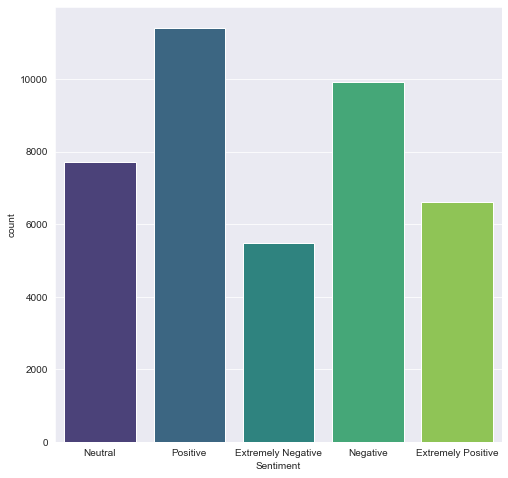

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 8))
sns.countplot(x = train['Sentiment'] , palette = 'viridis')
plt.show()

In [7]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
train = train.drop(columns = ['UserName', 'ScreenName', 'Location', 'TweetAt'])

In [9]:
train.reset_index(drop=True, inplace=True)
train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
!pip install fastai

In [11]:
from fastai.text.all import *

In [12]:
dls = TextDataLoaders.from_df(train, valid_pct = 0.1, text_col = 'OriginalTweet', label_col = 'Sentiment', bs = 64, is_lm = True)

In [13]:
dls.show_batch()

,text,text_
0,"xxbos xxmaj dear xxup pm pls work on delivery system supermarket has slots full for all the time 3 days passed xxmaj we are not ready for complete lock down in case of crisis xxmaj deploy to xxmaj ntuc not 19 xxbos xxmaj thank you to all grocery , drug store and gas station employees for all your xxunk hard work to keep supplies and food available right now . xxmaj your","xxmaj dear xxup pm pls work on delivery system supermarket has slots full for all the time 3 days passed xxmaj we are not ready for complete lock down in case of crisis xxmaj deploy to xxmaj ntuc not 19 xxbos xxmaj thank you to all grocery , drug store and gas station employees for all your xxunk hard work to keep supplies and food available right now . xxmaj your support"
1,"xxmaj covid_19 # coronavirus # fridayfeeling # fridayvibes xxbos xxmaj full xxmaj circle xxmaj research xxmaj reveals xxmaj increased xxmaj consumer xxmaj anxiety xxmaj over xxup covid-19 & & xxmaj impact xxmaj over xxmaj events xxmaj sector w / a xxmaj delayed xxmaj return xxmaj to xxmaj xxunk xxmaj after # xxmaj coronavirus | xxunk \r\r\n https : / / t.co / xxunk xxbos xxunk , xxunk and others in the consumer","covid_19 # coronavirus # fridayfeeling # fridayvibes xxbos xxmaj full xxmaj circle xxmaj research xxmaj reveals xxmaj increased xxmaj consumer xxmaj anxiety xxmaj over xxup covid-19 & & xxmaj impact xxmaj over xxmaj events xxmaj sector w / a xxmaj delayed xxmaj return xxmaj to xxmaj xxunk xxmaj after # xxmaj coronavirus | xxunk \r\r\n https : / / t.co / xxunk xxbos xxunk , xxunk and others in the consumer packaged"
2,"low as $ 25 per barrel , gold peaked then reduced opening xxmaj march at xxunk per gram , now once again on a downward trajectory . https : / / t.co / xxunk xxbos xxup thank xxup you for having on to talk about s demand for food xxmaj for ways to help go to xxbos xxmaj hoarding toilet paper stockpiling weed applying vodka as hand sanitizer making music videos using","as $ 25 per barrel , gold peaked then reduced opening xxmaj march at xxunk per gram , now once again on a downward trajectory . https : / / t.co / xxunk xxbos xxup thank xxup you for having on to talk about s demand for food xxmaj for ways to help go to xxbos xxmaj hoarding toilet paper stockpiling weed applying vodka as hand sanitizer making music videos using urine"
3,"/ t.co / xxunk g xxbos xxunk xxmaj at my local supermarket before we were made aware of xxup covid-19 , one of the cashiers had a mask on & & a customer in line xxunk him for wearing it . xxmaj turns out he had a heart transplant & & couldnât risk being exposed to anything tha xxbos xxmaj consumer xxmaj reports has developed a "" coronavirus xxmaj resource xxmaj hub","t.co / xxunk g xxbos xxunk xxmaj at my local supermarket before we were made aware of xxup covid-19 , one of the cashiers had a mask on & & a customer in line xxunk him for wearing it . xxmaj turns out he had a heart transplant & & couldnât risk being exposed to anything tha xxbos xxmaj consumer xxmaj reports has developed a "" coronavirus xxmaj resource xxmaj hub """
4,"paper factory person \r\r\n ? ? xxunk star \r\r\n ? ? uber eats driver \r\r\n ? ? grocery store clerk \r\r\n ? ? delivery drug dealer xxbos xxmaj you need a government to lockdown you at such a short notice ? \r\r\n\r\r\n xxmaj fucks xxrep 4 ! \r\r\n\r\r\n xxmaj if xxmaj covid 19 does not starvation will take your xxmaj life coz yesterday we were told , no xxmaj panic xxmaj buying","factory person \r\r\n ? ? xxunk star \r\r\n ? ? uber eats driver \r\r\n ? ? grocery store clerk \r\r\n ? ? delivery drug dealer xxbos xxmaj you need a government to lockdown you at such a short notice ? \r\r\n\r\r\n xxmaj fucks xxrep 4 ! \r\r\n\r\r\n xxmaj if xxmaj covid 19 does not starvation will take your xxmaj life coz yesterday we were told , no xxmaj panic xxmaj buying ."
5,"step go further xxbos @arabnews xxmaj manipulation of fuel prices , in the current xxup covid 19 crisis , is uncalled for and xxunk

In [14]:
learn = language_model_learner(dls, AWD_LSTM, drop_mult = 0.3)

SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.033113110810518265)

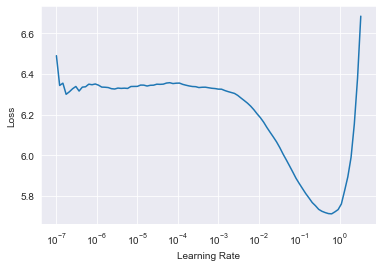

In [15]:
learn.lr_find()

In [17]:
learn.save('fine_tuned')
learn.save_encoder('fine_tuned_enc')

In [18]:
data_class = TextDataLoaders.from_df(train, valid_pct = 0.1, text_col = 'OriginalTweet', label_col = 'Sentiment', bs = 64, text_vocab = dls.vocab)

In [19]:
data_class.show_batch()

,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,"xxbos # coronavirus xxmaj people , xxup stop xxup panic xxup buying , xxup you xxup do xxup not xxup need xxup to xxup stock xxup up xxup on xxup food xxup like xxup you xxup wo n't xxup see xxup the xxup sun xxup for xxup the xxup rest xxup of xxup your xxup life , xxup no xxup one xxup told xxup us xxup to xxup stock xxup up xxup on xxup toilet xxup paper , xxup no xxup one xxup told xxup us xxup to xxup stock xxup up xxup on xxup hand xxup sanitizer , xxup just xxup regular xxup soap xxup works xxup better . ( 1 )",Positive
2,"xxbos # xxup xxunk : xxup xxunk ' xxup back & & xxup forth xxup in xxup my xxup chair , xxup wearin ' xxup my xxup xxunk , xxup wrapped xxup in xxup my xxup blanket , xxup xxunk ' xxup exhausted , xxup xxunk ' xxunk xxup xxunk ' xxup in xxup line xxup at xxup the xxup supermarket , xxup xxunk ' xxup like xxup i m xxup cool xxup wit ' # xxup socialdistancing xxup there … . xxup why i xxup have xxup to xxup wait xxup so xxup long xxup before xxup xxunk https : / / t.co / xxunk",Positive
3,xxbos ? premium xxup offers ? \r\r\n ? ? get xxup in xxup touch xxup for xxup deals ? ? \r\r\n xxmaj over 3 xxrep 3 0 channels ? \r\r\n xxmaj over 12 xxrep 3 0 movies and series ? ? \r\r\n\r\r\n xxmaj free trials available ? \r\r\n\r\r\n ? sports \r\r\n ? movies \r\r\n ? music \r\r\n ? ppv xxup events \r\r\n ? ? kids \r\r\n ? uk / xxup usa \r\r\n ? xxunk \r\r\n ? catch xxup up \r\r\n ? xxunk \r\r\n\r\r\n xxmaj whatsapp : xxunk \r\r\n\r\r\n▁ # xxup iptv # xxmaj firestick # xxup xxunk # xxunk https : / / t.co / xxunk,Positive
4,"xxbos xxmaj essential xxmaj cleaning xxmaj here ! \r\r\n xxup the # xxup coronavirus xxup is xxup no xxup joke / xxmaj simple xxmaj no xxmaj rush xxmaj booking . a xxmaj cleaning xxmaj company xxmaj you xxmaj can xxmaj trust . \r\r\n xxmaj specializing in xxmaj vacation xxmaj rentals , xxmaj xxunk , xxunk and xxmaj much xxmaj more . \r\r\n xxmaj prices xxmaj starting @ 2 xxmaj hours 2 xxmaj maids $ 77 \r\r\n ( xxunk ) xxrep 3 3 xxunk \r\r\n▁ # lasvegas # xxmaj xxunk # xxmaj summerlin # xxunk https : / / t.co / xxunk",Positive
5,xxbos xxmaj this # xxmaj afternoon : xxmaj at xxup bs i could n't buy scratchers b / c it was # closed b / c of # coronavirus . xxmaj after xxup bs i walked to # xxmaj water xxmaj store to buy $ 2 scratchers . i won $ 10 with xxup xxunk and $ 1 with xxup xxunk . xxmaj after xxup ws i walked to # xxmaj mexican # xxmaj grocery to buy $ 2 scratchers . i lost $ 1 with xxup xxunk and $ 1 with xxup xxunk .,Positive
6,xxbos # xxup coronavirus xxup alert : xxmaj we understand how important it is for everyone to keep clean & & disinfected \r\r\n xxmaj let xxmaj us xxmaj help ? xxmaj all xxmaj supplies xxmaj needed f / xxmaj disinfecting & & xxmaj cleaning xxmaj provided \r\r\n xxmaj prices xxmaj starting @ 2 xxmaj hours 2 xxmaj maids $ 75 \r\r\n xxmaj book xxmaj online or xxmaj call xxmaj today @ \r\r\n https : / / t.co / xxunk / ( xxunk - xxunk \r\r\n▁ # lasvegas https : / / t.co / xxunk,Extremely Positive
7,"xxbos $ xxunk xxmaj xxunk xxmaj holdings , xxmaj inc . , xxmaj developing xxmaj hand # xxmaj sanitizer xxmaj infused with # xxmaj hemp xxmaj seed xxmaj oil \r\r\n\r\r\n $ gild $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ aim $ knos $ xxunk \r\r\n $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ xxunk $ aim $ xxunk $ xxunk $ xxunk # coronavirus \r\r\n▁ # xxup covid19 \r\r\n\r\r\n https : / / t.co / xxunk g",Positive
8,"xxbos xxmaj peace xxup breaking xxup news xxmaj dr . xxmaj ab

In [20]:
learn = text_classifier_learner(data_class, AWD_LSTM, drop_mult=0.5, metrics=[accuracy])
learn.load_encoder('fine_tuned_enc')

In [28]:
learn.predict("This pandemic is destroying our lives")

('Extremely Positive',
 tensor(1),
 tensor([0.1776, 0.2140, 0.1958, 0.2128, 0.1998]))